In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation

**Data & Source:** <br>
`national-gdp-world.csv`  [Source Link](https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators)<br>
`nation-gdp-per-capita-world.csv`  [Source Link](https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators)<br>
`annual-working-hours-world.csv`  [Source Link](https://febpwt.webhosting.rug.nl/Home)<br>
`annual-working-hours-vs-gdp-per-capita.csv`  [Source Link](https://febpwt.webhosting.rug.nl/Home)<br>

In [2]:
nation_gdp = pd.read_csv('national-gdp-world.csv')
nation_gdp_per_capita = pd.read_csv('nation-gdp-per-capita-world.csv')
annual_working_hours = pd.read_csv('annual-working-hours-world.csv')
working_hours_vs_gdp_per_capita = pd.read_csv('annual-working-hours-vs-gdp-per-capita.csv')

In [3]:
# Select countries with top five GDP amount in 2021
selected_countries = nation_gdp[nation_gdp['Year'] == 2021].sort_values(by='GDP (constant 2015 US$)', ascending=False).dropna()['Entity'][1:11]

In [4]:
list(selected_countries.values)

['United States',
 'China',
 'Japan',
 'Germany',
 'United Kingdom',
 'India',
 'France',
 'Italy',
 'Brazil',
 'South Korea']

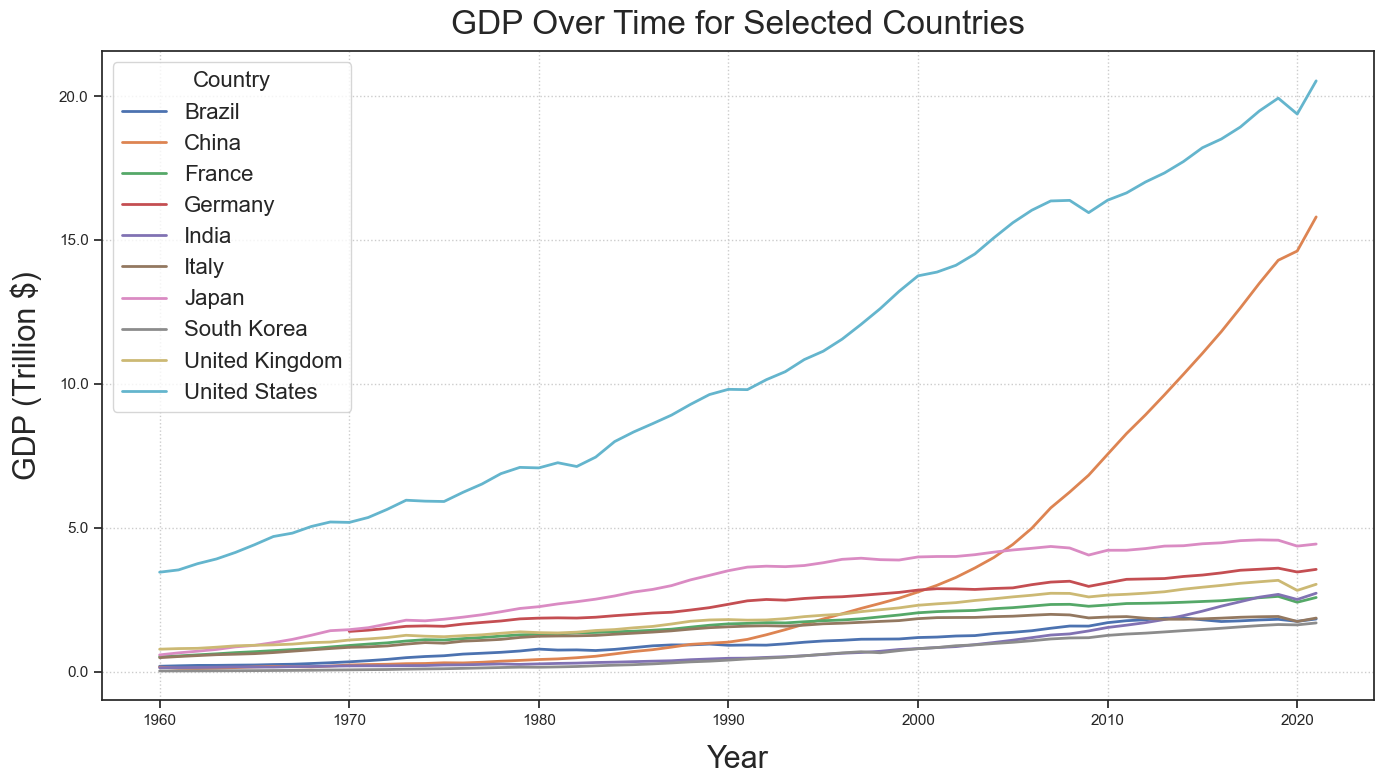

In [5]:
nation_gdp_filtered = nation_gdp[nation_gdp['Entity'].isin(selected_countries)]
def formatter(x, pos):
    return '{:.1f}'.format(x*1e-12)

formatter = ticker.FuncFormatter(formatter)

sns.set(style="ticks")
plt.figure(figsize=(14, 8))
sns.lineplot(data=nation_gdp_filtered, x='Year', y='GDP (constant 2015 US$)', hue='Entity', linewidth=2, linestyle='-')
plt.grid(linewidth=1, linestyle=':')
plt.title('GDP Over Time for Selected Countries', fontsize='24', pad=12.5)
plt.xlabel('Year', fontsize='22', labelpad =12.5)
plt.ylabel('GDP (Trillion $)', fontsize='22', labelpad =12.5)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend(title='Country', title_fontsize='16', fontsize='16', loc='upper left')
plt.tight_layout()
plt.savefig('nation_gpd.png')
plt.show()

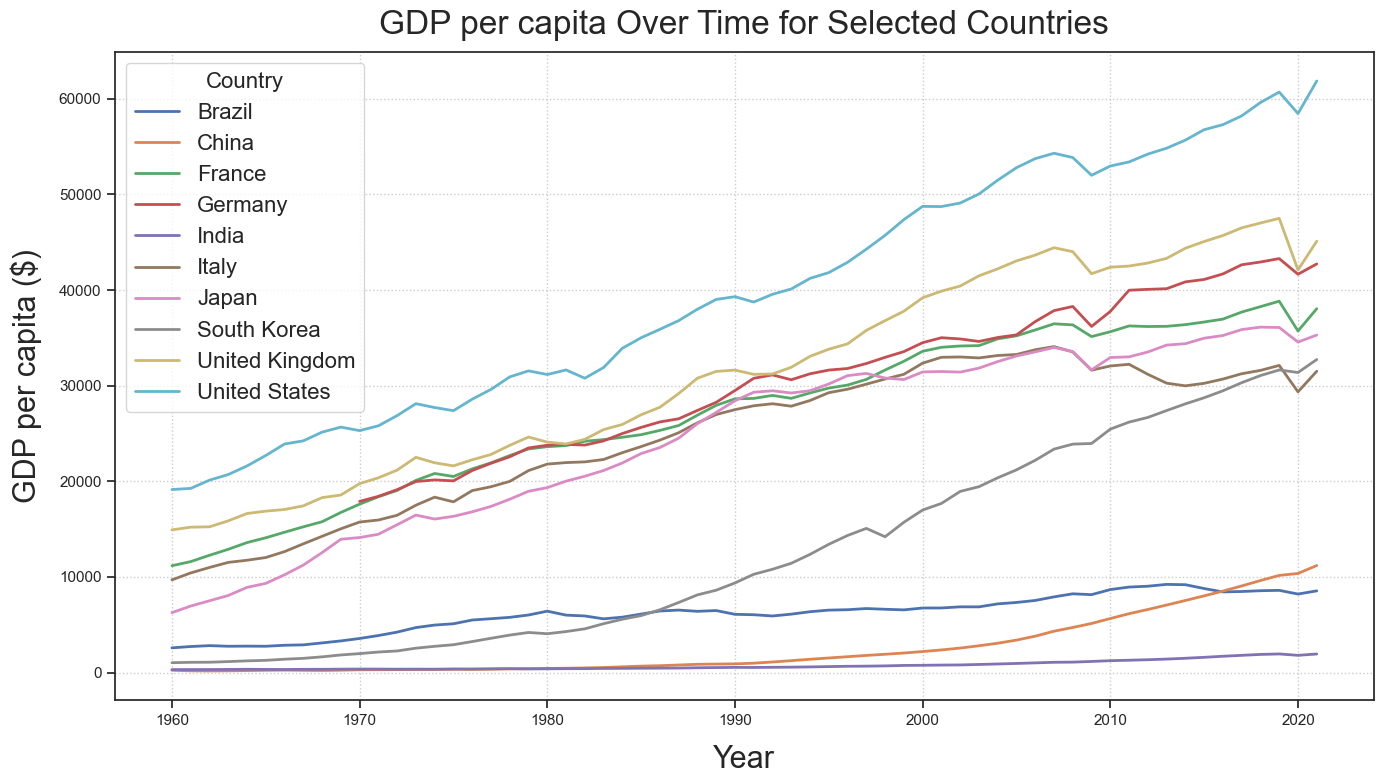

In [6]:
nation_gdp_per_capita_filtered = nation_gdp_per_capita[nation_gdp['Entity'].isin(selected_countries)]

sns.set(style="ticks")
plt.figure(figsize=(14, 8))
sns.lineplot(data=nation_gdp_per_capita_filtered, x='Year', y='GDP per capita (constant 2015 US$)', hue='Entity', linewidth=2)
plt.grid(linewidth=1, linestyle=':')
plt.title('GDP per capita Over Time for Selected Countries', fontsize='24', pad=12.5)
plt.xlabel('Year', fontsize='22', labelpad =12.5)
plt.ylabel('GDP per capita ($)', fontsize='22', labelpad =12.5)
plt.legend(title='Country', title_fontsize='16', fontsize='16', loc='upper left')
plt.tight_layout()
plt.savefig('nation_gpd_per_capita.png')
plt.show()

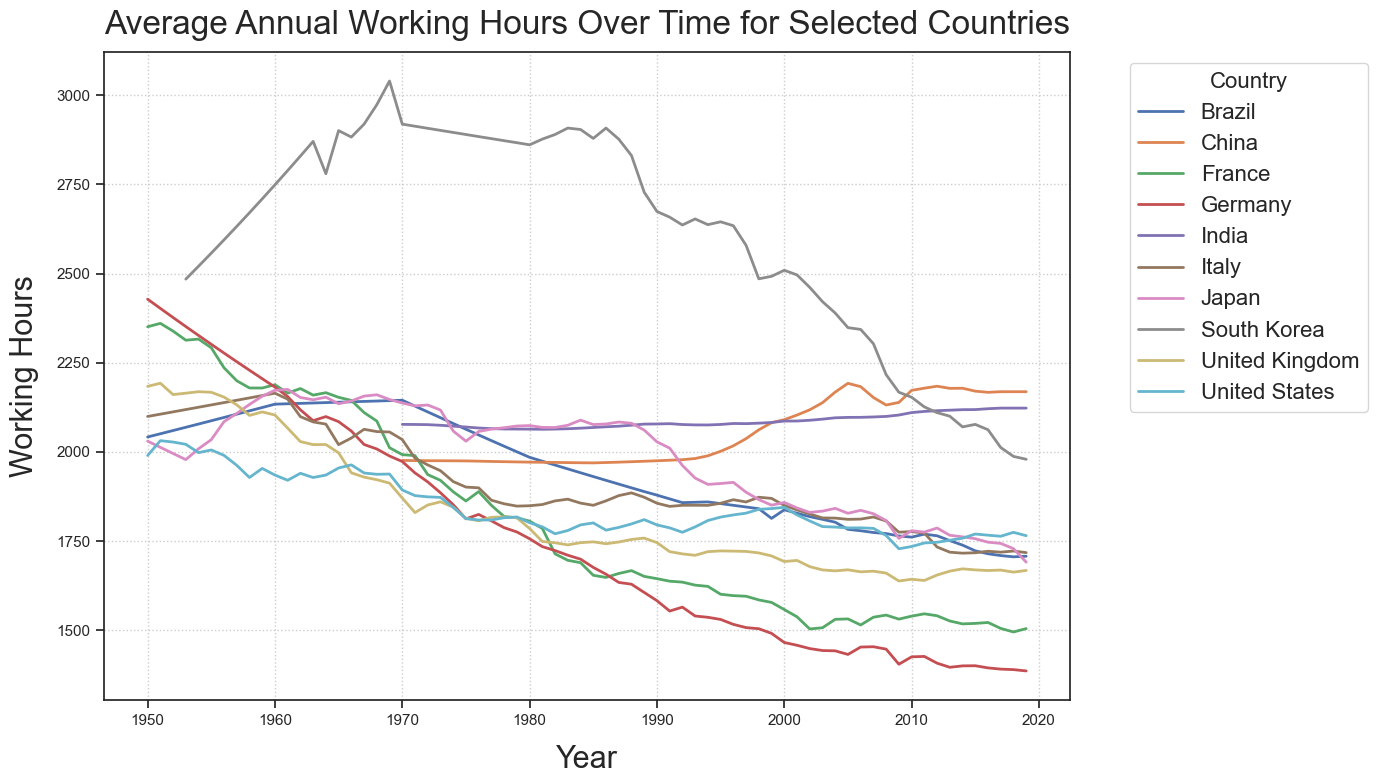

In [7]:
nation_annual_working_hours_filtered = annual_working_hours[annual_working_hours['Entity'].isin(selected_countries) & (annual_working_hours['Year'] >= 1950)]
nation_annual_working_hours_filtered = nation_annual_working_hours_filtered[['Entity', 'Year', 'Annual working hours per worker']]

sns.set(style="ticks")
plt.figure(figsize=(14, 8))
sns.lineplot(data=nation_annual_working_hours_filtered,  x='Year', y='Annual working hours per worker', hue='Entity', linewidth=2)
plt.grid(linewidth=1, linestyle=':')
plt.title('Average Annual Working Hours Over Time for Selected Countries', fontsize='24', pad=12.5)
plt.xlabel('Year', fontsize='22', labelpad =12.5)
plt.ylabel('Working Hours', fontsize='22', labelpad =12.5)
plt.legend(title='Country', title_fontsize='16', fontsize='16', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('annual_working_hours.png')
plt.show()

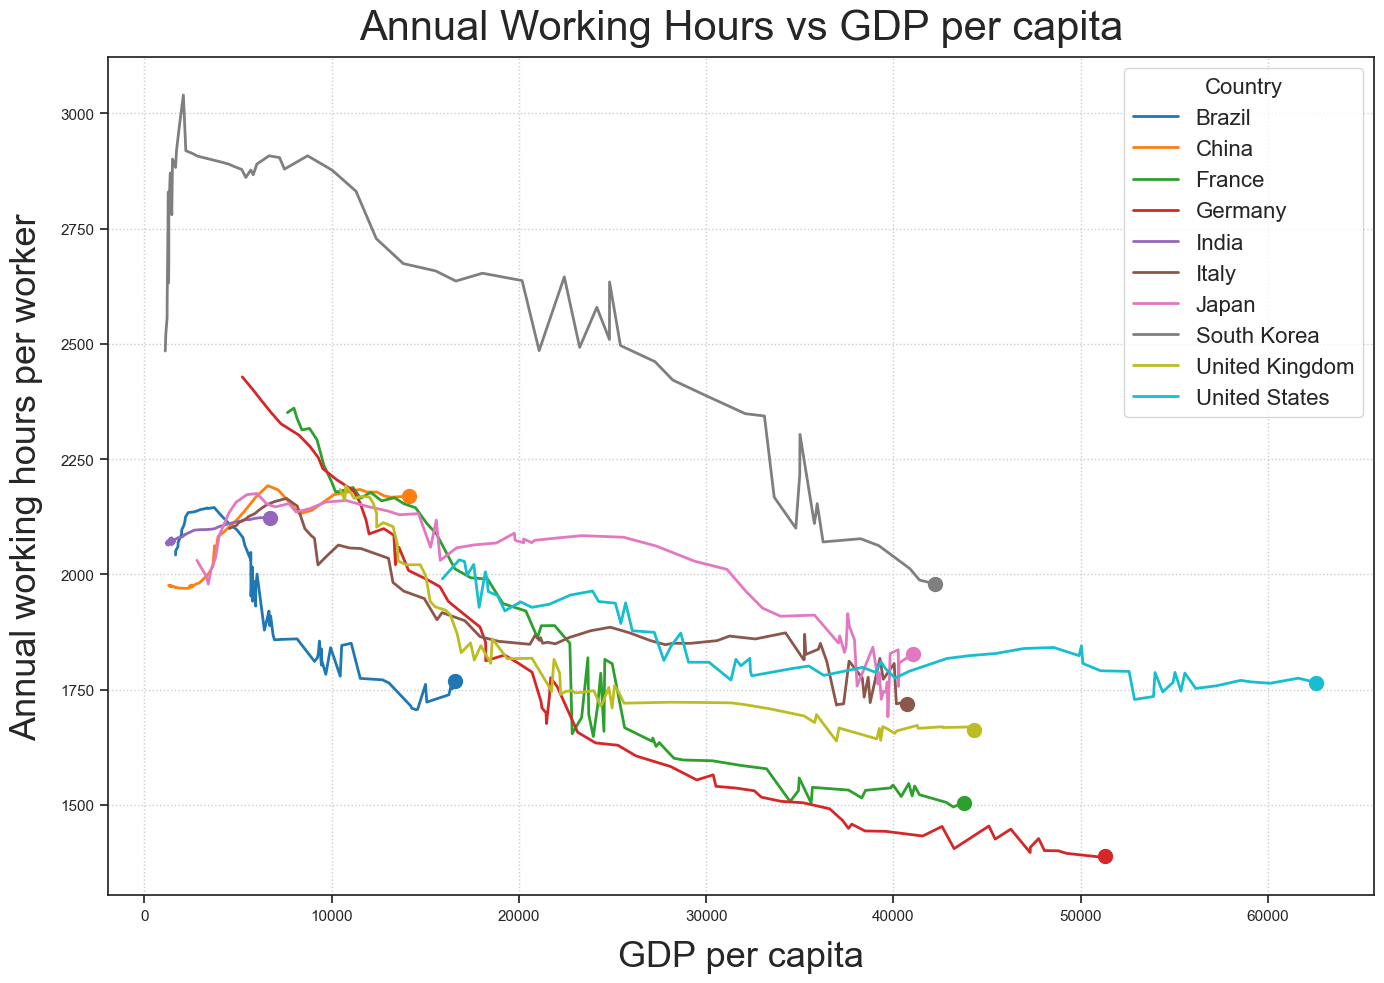

In [8]:
working_hours_vs_gdp_per_capita_filtered = working_hours_vs_gdp_per_capita[working_hours_vs_gdp_per_capita['Entity'].isin(selected_countries) & (working_hours_vs_gdp_per_capita['Year'] >= 1950)]
working_hours_vs_gdp_per_capita_filtered = working_hours_vs_gdp_per_capita_filtered[['Entity', 'Year', 'Annual working hours per worker', 'GDP per capita (output, multiple price benchmarks)', 'Population (historical estimates)']]
sns.set(style="ticks")
plt.figure(figsize=(14, 10))
lineplot = sns.lineplot(data=working_hours_vs_gdp_per_capita_filtered, 
                        x='GDP per capita (output, multiple price benchmarks)', 
                        y='Annual working hours per worker', 
                        hue='Entity',
                        palette='tab10', 
                        linewidth=2, 
                        alpha=1)

ax = plt.gca()
for line in ax.lines:
    x = line.get_xdata()
    y = line.get_ydata()
    if len(x) > 0 and len(y) > 0:
        ax.plot(x[-1], y[-1], 'o', markersize=10, color=line.get_color())

plt.grid(linewidth=1, linestyle=':')
plt.title('Annual Working Hours vs GDP per capita', fontsize='30', pad=12.5)
plt.xlabel('GDP per capita', fontsize='26', labelpad =12.5)
plt.ylabel('Annual working hours per worker', fontsize='26', labelpad =12.5)
plt.legend(title='Country', title_fontsize='16', fontsize='16')
plt.tight_layout()
plt.savefig('annual_working_hours_vs_gdp_per_capita.png')
plt.show()

In [9]:
animation_data = working_hours_vs_gdp_per_capita_filtered[working_hours_vs_gdp_per_capita_filtered['Year'] <= 2019]
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

def update(year):
    plt.clf()
    current_data = animation_data[animation_data['Year'] <= year]
    sns.lineplot(
        data=current_data, 
        x='GDP per capita (output, multiple price benchmarks)', 
        y='Annual working hours per worker',
        hue='Entity',
        palette='deep', 
        linewidth=2.5
    )

    ax = plt.gca()
    for line in ax.lines:
        x = line.get_xdata()
        y = line.get_ydata()
        if len(x) > 0 and len(y) > 0:
            ax.plot(x[-1], y[-1], 'o', markersize=10, color=line.get_color())

    plt.grid(linewidth=1, linestyle=':')
    plt.title(f'Annual Working Hours vs GDP per Capita (Year: {year})', fontsize=30, pad =12.5)
    plt.xlabel('GDP per capita', fontsize=26, labelpad =12.5)
    plt.ylabel('Annual working hours per worker', fontsize=26, labelpad =12.5)
    plt.legend(title='Country', title_fontsize='16', fontsize='16', loc='upper right')

years = animation_data['Year'].unique()
ani = FuncAnimation(plt.gcf(), update, frames=years, repeat=False, interval=1)
ani.save('working_hours_vs_gdp_per_capita.mp4', writer='ffmpeg', fps=5)
plt.close()


In [10]:
developing_countries = ['China', 'Russia', 'India', 'Brazil', 'Mexico']
developed_countries = ['United States', 'Japan', 'Germany', 'United Kingdom', 'France']
asian_countries = ['China', 'Japan', 'India', 'South Korea', 'Indonesia']
western_countries = ['United States', 'Germany', 'United Kingdom', 'France', 'Italy']

In [11]:
developing_country_df = working_hours_vs_gdp_per_capita[working_hours_vs_gdp_per_capita['Entity'].isin(developing_countries) & (working_hours_vs_gdp_per_capita['Year'] >= 1950)]
developed_country_df = working_hours_vs_gdp_per_capita[working_hours_vs_gdp_per_capita['Entity'].isin(developed_countries) & (working_hours_vs_gdp_per_capita['Year'] >= 1950)]
asian_country_df = working_hours_vs_gdp_per_capita[working_hours_vs_gdp_per_capita['Entity'].isin(asian_countries) & (working_hours_vs_gdp_per_capita['Year'] >= 1950)]
western_country_df = working_hours_vs_gdp_per_capita[working_hours_vs_gdp_per_capita['Entity'].isin(western_countries) & (working_hours_vs_gdp_per_capita['Year'] >= 1950)]

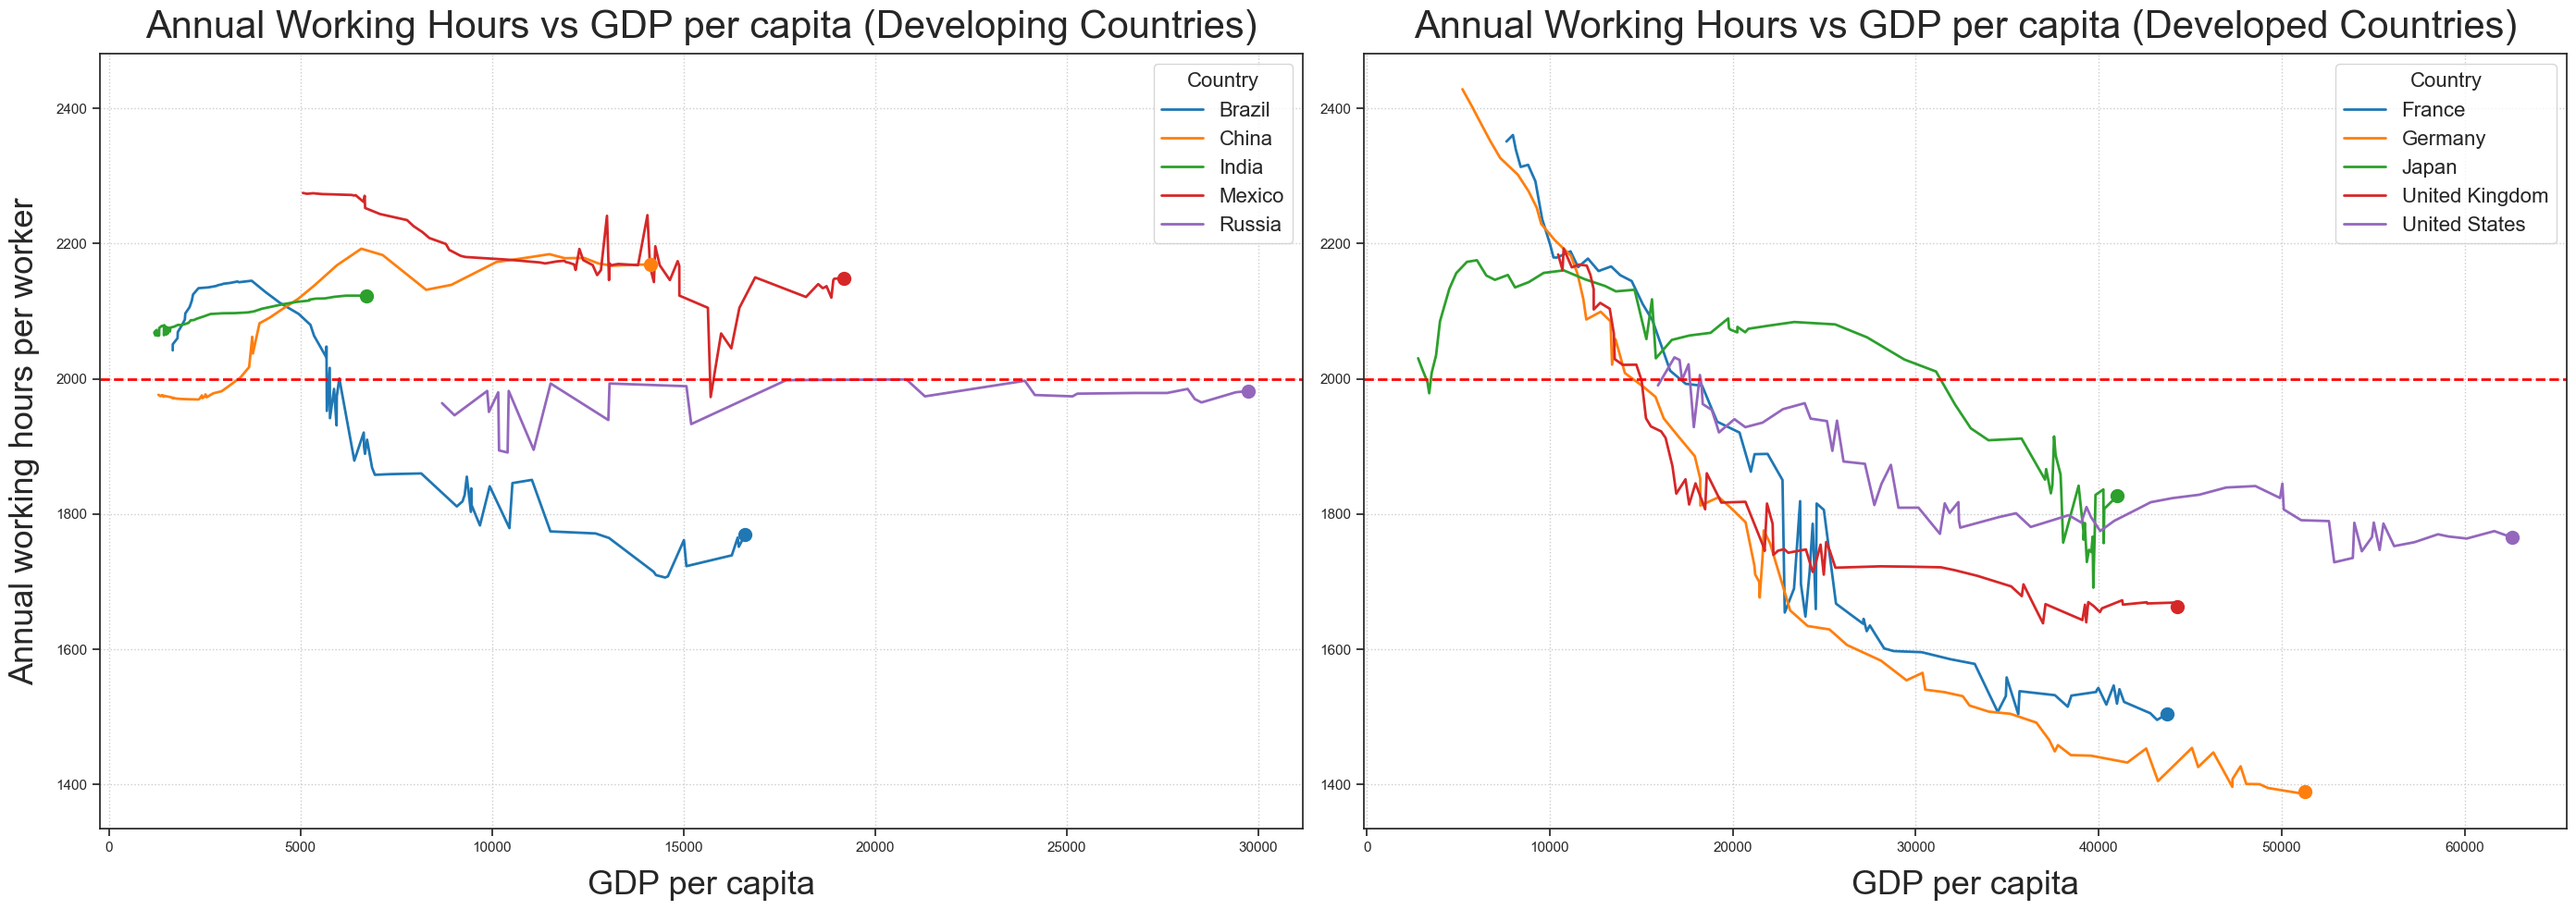

In [12]:
sns.set(style="ticks")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))

# Developing Countries
sns.lineplot(data=developing_country_df, 
                        x='GDP per capita (output, multiple price benchmarks)', 
                        y='Annual working hours per worker', 
                        hue='Entity',
                        palette='tab10', 
                        linewidth=2, 
                        alpha=1,
                        ax=ax1)

# ax = plt.gca()
for line in ax1.lines:
    x = line.get_xdata()
    y = line.get_ydata()
    if len(x) > 0 and len(y) > 0:
        ax1.plot(x[-1], y[-1], 'o', markersize=10, color=line.get_color())

ax1.grid(linewidth=1, linestyle=':')
ax1.set_title('Annual Working Hours vs GDP per capita (Developing Countries)', fontsize='30', pad=12.5)
ax1.set_xlabel('GDP per capita', fontsize='26', labelpad =12.5)
ax1.set_ylabel('Annual working hours per worker', fontsize='26', labelpad =12.5)
ax1.legend(title='Country', title_fontsize='16', fontsize='16')

# Developed Countries
sns.lineplot(data=developed_country_df, 
                        x='GDP per capita (output, multiple price benchmarks)', 
                        y='Annual working hours per worker', 
                        hue='Entity',
                        palette='tab10', 
                        linewidth=2, 
                        alpha=1,
                        ax=ax2)

for line in ax2.lines:
    x = line.get_xdata()
    y = line.get_ydata()
    if len(x) > 0 and len(y) > 0:
        ax2.plot(x[-1], y[-1], 'o', markersize=10, color=line.get_color())

ax2.grid(linewidth=1, linestyle=':')
ax2.set_title('Annual Working Hours vs GDP per capita (Developed Countries)', fontsize='30', pad=12.5)
ax2.set_xlabel('GDP per capita', fontsize='26', labelpad =12.5)
ax2.set_ylabel('')
ax2.legend(title='Country', title_fontsize='16', fontsize='16')

ax1.axhline(2000, color='red', linestyle='--', linewidth=2)
ax2.axhline(2000, color='red', linestyle='--', linewidth=2)


ymin = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
ymax = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(ymin, ymax)
ax2.set_ylim(ymin, ymax)

plt.tight_layout()
plt.savefig('country_comparison.png')
plt.show()

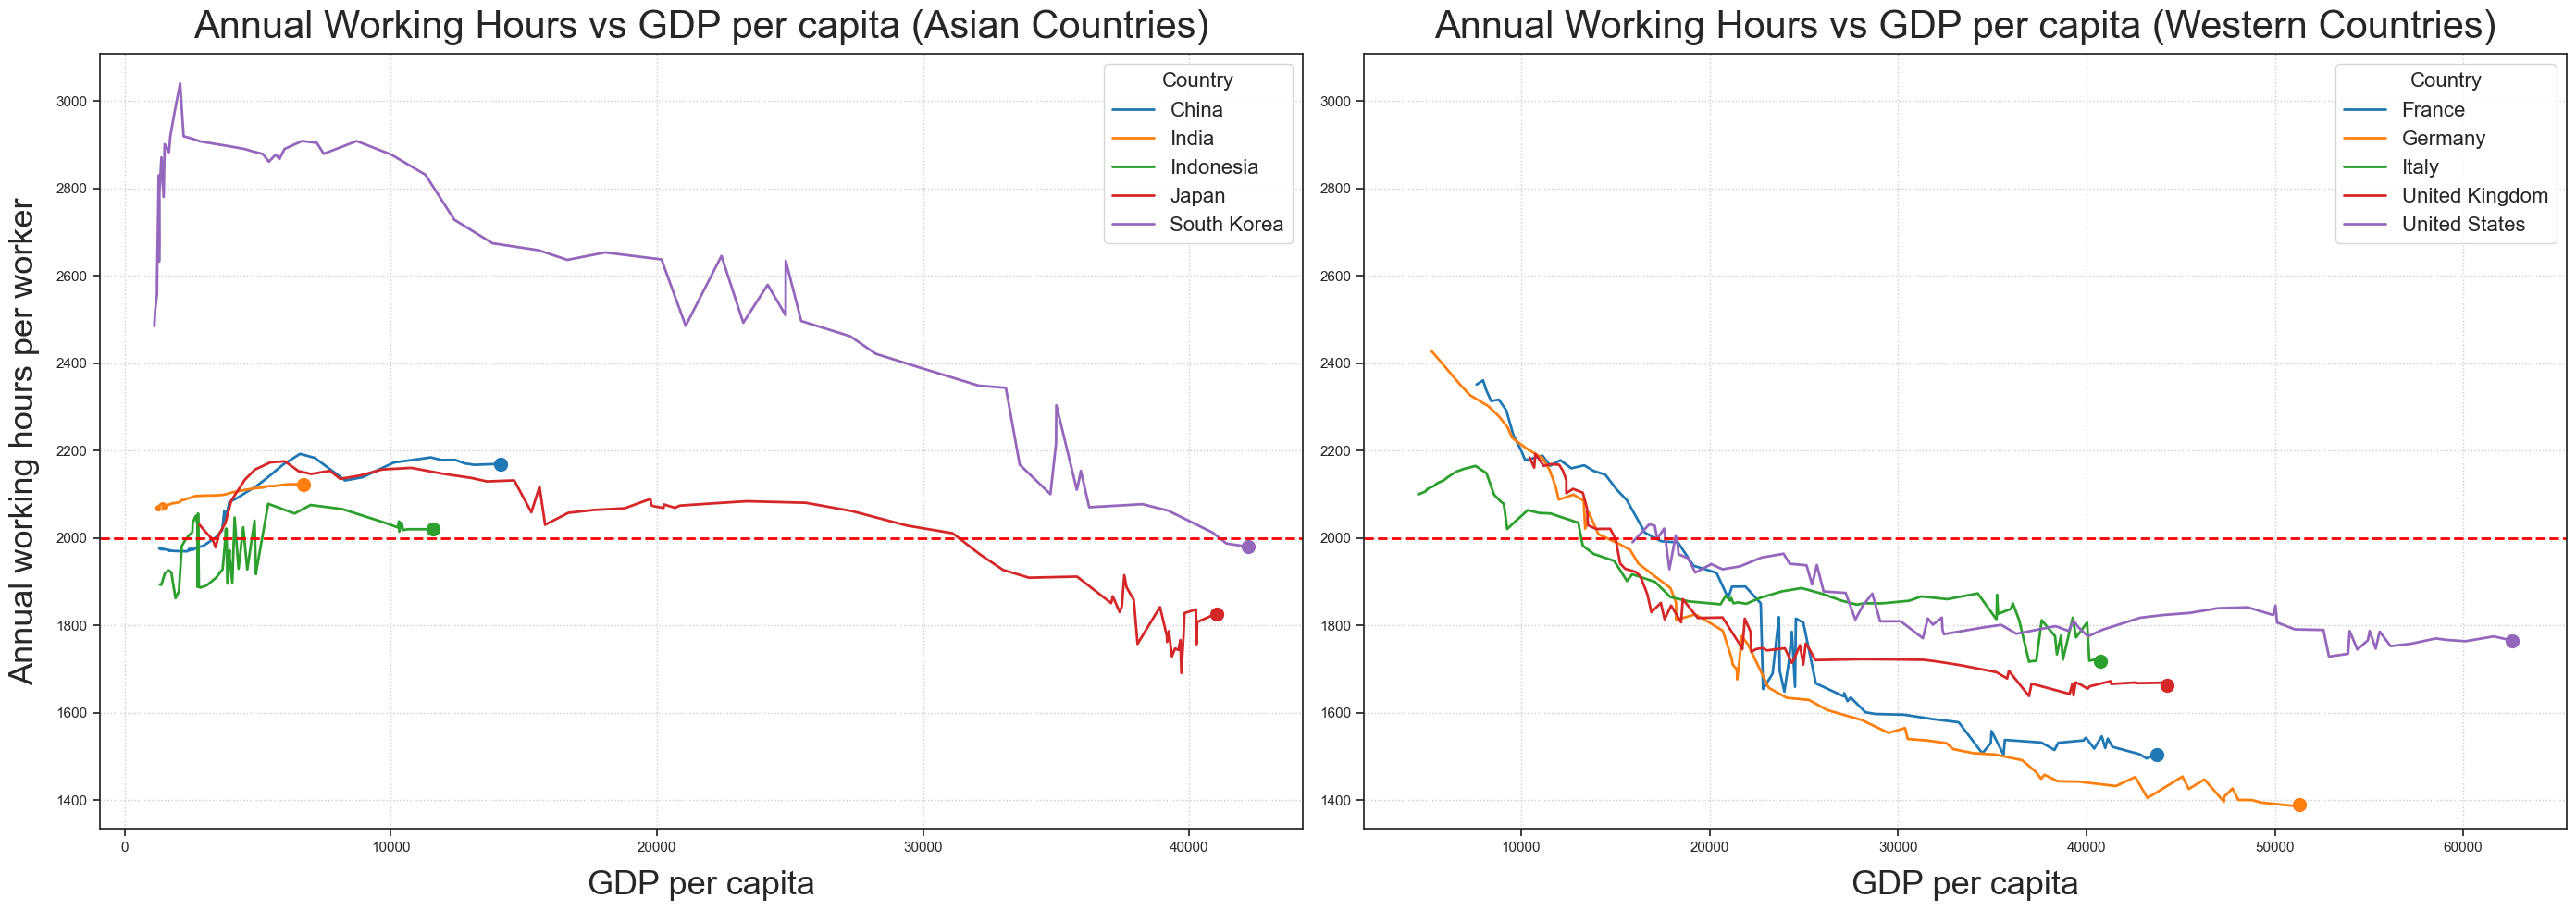

In [13]:
sns.set(style="ticks")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))

# Asian Countries
sns.lineplot(data=asian_country_df, 
                        x='GDP per capita (output, multiple price benchmarks)', 
                        y='Annual working hours per worker', 
                        hue='Entity',
                        palette='tab10', 
                        linewidth=2, 
                        alpha=1,
                        ax=ax1)

for line in ax1.lines:
    x = line.get_xdata()
    y = line.get_ydata()
    if len(x) > 0 and len(y) > 0:
        ax1.plot(x[-1], y[-1], 'o', markersize=10, color=line.get_color())

ax1.grid(linewidth=1, linestyle=':')
ax1.set_title('Annual Working Hours vs GDP per capita (Asian Countries)', fontsize='30', pad=12.5)
ax1.set_xlabel('GDP per capita', fontsize='26', labelpad =12.5)
ax1.set_ylabel('Annual working hours per worker', fontsize='26', labelpad =12.5)
ax1.legend(title='Country', title_fontsize='16', fontsize='16')

# Western Countries
sns.lineplot(data=western_country_df, 
                        x='GDP per capita (output, multiple price benchmarks)', 
                        y='Annual working hours per worker', 
                        hue='Entity',
                        palette='tab10', 
                        linewidth=2, 
                        alpha=1,
                        ax=ax2)

for line in ax2.lines:
    x = line.get_xdata()
    y = line.get_ydata()
    if len(x) > 0 and len(y) > 0:
        ax2.plot(x[-1], y[-1], 'o', markersize=10, color=line.get_color())

ax2.grid(linewidth=1, linestyle=':')
ax2.set_title('Annual Working Hours vs GDP per capita (Western Countries)', fontsize='30', pad=12.5)
ax2.set_xlabel('GDP per capita', fontsize='26', labelpad =12.5)
ax2.set_ylabel('')
ax2.legend(title='Country', title_fontsize='16', fontsize='16')

ax1.axhline(2000, color='red', linestyle='--', linewidth=2)
ax2.axhline(2000, color='red', linestyle='--', linewidth=2)


ymin = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
ymax = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(ymin, ymax)
ax2.set_ylim(ymin, ymax)

plt.tight_layout()
plt.savefig('region_comparison.png')
plt.show()